# Target Store Sales Prediction
#### Content:
Here provided with historical sales data for 45 stores located in different region search store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

#### Problem description: 
One challenge of modeling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales the challenge is to predict which departments will be affected and to what extent.


In [1]:
# Importing necessary libraires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing all the dataset

In [2]:
df1= pd.read_csv('Business_Data.csv') #Business_Data
df2= pd.read_csv('Sales_History.csv') #Sales_History
df3= pd.read_csv('Store_Details.csv') #Store_Details

### Approach:
- **Understand the data variables properly**
- **Cleaning the data:** Cleaning the data, that is, fill the missing values (if any), treat the outliers (or odd values), etc. Ensureing each variable’s data is as per the nature of the variable (e.g. Date field should contain only date values – can extract year, month and day of the week, and numeric column should be formatted as numeric, etc.)
- **Conducting EDA (Exploratory Data Analysis) on the cleaned Data**
- **Uni-variate and Bi-variate Analysis:** Checking the distribution of independent variables and also compare them with the dependent variable.
- **Feature Engineering**
- **Hypothesis Testing**
- **Identify the most important variables (or data parameters) that affect the final decision:** Identify the impact of each variable on the final result graphically (correlation / scatter plots, regression plots, etc.). Keeping those variables that affect the final outcome
- **Develop and Validate Samples**
- **Model Building**
- **Improving model accuracy:** We know that machine learning algorithms are driven by parameters. These parameters majorly influence the outcome of learning process. So, find the optimum value for each parameter to improve the accuracy of the model and repeat this process with a number of well performing models


### Data Preprocessing

1. Sales history - Historical sales data of each store from 30th April 2017 to 25th October 2019 having 421570 data points and 5 columns.
2. Store details - Anonymized information about 45 stores indicating store type, Address, Location and
size of store.
3. Business data - Contains additional data related to the store, department, and regional activity for the
given dates.

Lets look at the head of all three dataset

In [3]:
df1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday
0,1,4/30/2017,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,11/30/2017,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2/17/2017,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2/24/2017,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,5/1/2017,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
df2.head()

,Store,Department,Date,Total_Sales,Holiday
0,1,1,4/30/2017,24924.50,False
1,1,1,11/30/2017,46039.49,True
2,1,1,2/17/2017,41595.55,False
3,1,1,2/24/2017,19403.54,False
4,1,1,05-01-2017,21827.90,False


In [5]:
df3.head()

,Store,Type,Address,Area_Code,Location,Size
0,1,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
1,2,E-Commerce Fulfillment,"1000 Commerce Ave, Atwater, California",95301,Bayfair Cente,202307
2,3,Food,"15555 East 14th Street, San Leandro, California",94578,Capitola Mal,37392
3,4,E-Commerce Fulfillment,"1855 41st Avenue, Capitola, California",95010,Chino Spectrum Marketplace�& Towne Cente,205863
4,5,Food,"3800-4046 Grand Ave.& 3801-4097 Grand Ave., Ch...",91710,Eagle Rock Plaz,34875


In [6]:
# Lets look at the shape of all three dataset
print(df1.shape) #business data
print(df2.shape) #sales history
print(df3.shape) #Store details

(8190, 12)
(421570, 5)
(45, 6)


It is very important to merges these data on same column ['Store', 'Date']. We are going to mergred first df1 which is business data and df2 which is sales history data.

Before going to merged these data, first we will group all the sales hstory data on date, because there are lots of transaction happend on same date.

In [7]:
# Checking how many transaction happend on same date 4/30/2017
df2[df2['Date']=='4/30/2017']

,Store,Department,Date,Total_Sales,Holiday
0,1,1,4/30/2017,24924.50,False
143,1,2,4/30/2017,50605.27,False
286,1,3,4/30/2017,13740.12,False
429,1,4,4/30/2017,39954.04,False
572,1,5,4/30/2017,32229.38,False
...,...,...,...,...,...
420727,45,92,4/30/2017,68203.08,False
420870,45,93,4/30/2017,4002.34,False
421147,45,95,4/30/2017,63833.63,False
421292,45,97,4/30/2017,8393.22,False


Before going to grouping as we seen in Sales History (df2) has Two garbage columns 'Holiday' and 'Department', in business data (df1) Holiday column is already there so, we will remove from df2. There is no use of 'Department' column in model building, so we will also remove it.


In [8]:
# Removing the garbage columns from df2
df2.drop(['Holiday','Department'],axis=1,inplace=True)


In [9]:
#Now we will group the df2 on date columns
df2= df2.groupby(['Store','Date']).agg({'Total_Sales': 'sum'}).reset_index()
df2.head()

,Store,Date,Total_Sales
0,1,01-02-2018,1495064.75
1,1,01-04-2019,1624477.58
2,1,01-05-2018,1488538.09
3,1,01-08-2017,1453329.50
4,1,01-11-2019,1459601.17


In [10]:
# lets see the shape of df2
df2.shape

(6435, 3)

In [11]:
# Merging all 3 datasets based on common columns
df1_df2 = pd.merge(df1, df2, how = 'left', left_on=['Store','Date'], right_on = ['Store','Date'])
df = pd.merge(df1_df2, df3, on = 'Store', how = 'left')
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Address,Area_Code,Location,Size
0,1,4/30/2017,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1643690.90,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
1,1,11/30/2017,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1641957.44,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
2,1,2/17/2017,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1611968.17,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
3,1,2/24/2017,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1409727.59,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
4,1,5/1/2017,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,NaN,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315


In [12]:
# Lets look at the shape of final data
df.shape

(8190, 18)

In [13]:
# After replacing all NA values with zero in each "MarkDown" column (NA stands for "no discount"), add all markdowns.
for i in ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']:
  df[i] = df[i].fillna(0)

The garbage columns "Store," "Address," "Area Code," and "Location" do not contribute anything to the model columns, which are unique information for each store (stores 1 through 45) in the form of huge texts and numbers. Because we already take shop size into account, there is no need to include these columns, hence they will be removed. 

Also, we are going to add all the MarksDowns which is discount given on particular dates and names a new column which is Totaol_markdown

In [14]:
# Replacing the Column Holidays , False =NO, and True=YES
df['Holiday']=np.where(df['Holiday']==False,"No","Yes")

# converting the column of Date into Datetime datatype and extracting week number from date columns
df['weeknumber']= pd.to_datetime(df['Date'],errors ='coerce').dt.week


<ipython-input-14-c198bd29df19>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weeknumber']= pd.to_datetime(df['Date'],errors ='coerce').dt.week


In [15]:
# Adding all the markdown 1 to 5:
df['Total_MarkDown']= df['MarkDown1']+df['MarkDown2']+df['MarkDown3']+df['MarkDown4']+df['MarkDown5']

# droping the useless columns 
df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Date','Store','Address', 'Area_Code', 'Location'], inplace = True,axis=1)
df.head()

,Temperature,Fuel_Price,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Size,weeknumber,Total_MarkDown
0,42.31,2.572,211.096358,8.106,No,1643690.90,E-Commerce Fulfillment,151315,17,0.0
1,38.51,2.548,211.242170,8.106,Yes,1641957.44,E-Commerce Fulfillment,151315,48,0.0
2,39.93,2.514,211.289143,8.106,No,1611968.17,E-Commerce Fulfillment,151315,7,0.0
3,46.63,2.561,211.319643,8.106,No,1409727.59,E-Commerce Fulfillment,151315,8,0.0
4,46.50,2.625,211.350143,8.106,No,NaN,E-Commerce Fulfillment,151315,18,0.0


In [16]:
df.describe()

,Temperature,Fuel_Price,CPI,Unemployment_Rate,Total_Sales,Size,weeknumber,Total_MarkDown
count,8190.000000,8190.000000,7605.000000,7605.000000,3.780000e+03,8190.000000,8190.000000,8190.000000
mean,59.356198,3.405992,172.460809,7.826821,1.042570e+06,130287.600000,25.851648,8881.703448
std,18.678607,0.431337,39.738346,1.877259,5.721346e+05,63115.971429,14.788965,19084.538888
min,-7.290000,2.472000,126.064000,3.684000,2.135383e+05,34875.000000,1.000000,-1692.480000
25%,45.902500,3.041000,132.364839,6.634000,5.463774e+05,70713.000000,13.000000,0.000000
50%,60.710000,3.513000,182.764003,7.806000,9.537690e+05,126512.000000,25.000000,0.000000
75%,73.880000,3.743000,213.932412,8.567000,1.401411e+06,202307.000000,38.000000,11819.642500
max,101.950000,4.468000,228.976456,14.313000,3.818686e+06,219622.000000,52.000000,783529.450000


From above table we conclude that:
- The average Temeprature is around 59.35, min= 7.290000, max=  101.950000
- The average CPI value is around 172
- The average Unemployment_Rate is around 7.826821 which is not too bad
- The Total_MarkDown which is discount given on that particular date, it should not be negative 

We will look at the neagative discount

In [17]:
df[df['Total_MarkDown']<0]

,Temperature,Fuel_Price,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Size,weeknumber,Total_MarkDown
5437,49.09,3.597,224.054703,6.237,No,NaN,Regional,42988,8,-1692.48
6518,68.04,3.204,222.325549,6.228,No,NaN,E-Commerce Fulfillment,39910,28,-80.11


As we seen from above data there are two rows where there is neagtive discount, we will remove it

In [18]:
# Droping all the Total_MarkDown  values  less than 0 in columns 'Total_MarkDown'
df.drop(df.index[df['Total_MarkDown'] < 0], inplace = True)
df.describe()

,Temperature,Fuel_Price,CPI,Unemployment_Rate,Total_Sales,Size,weeknumber,Total_MarkDown
count,8188.000000,8188.000000,7603.000000,7603.000000,3.780000e+03,8188.000000,8188.000000,8188.000000
mean,59.356391,3.405993,172.447465,7.827240,1.042570e+06,130309.299707,25.853566,8884.089378
std,18.680297,0.431378,39.735050,1.877327,5.721346e+05,63108.398424,14.789436,19086.254913
min,-7.290000,2.472000,126.064000,3.684000,2.135383e+05,34875.000000,1.000000,0.000000
25%,45.900000,3.041000,132.364839,6.634000,5.463774e+05,70713.000000,13.000000,0.000000
50%,60.710000,3.513000,182.716838,7.806000,9.537690e+05,126512.000000,25.000000,0.000000
75%,73.880000,3.743000,213.932412,8.567000,1.401411e+06,202307.000000,38.000000,11824.377500
max,101.950000,4.468000,228.976456,14.313000,3.818686e+06,219622.000000,52.000000,783529.450000


In [19]:
# Total missing values in the dataset
df.isnull().sum()/len(df) 

Temperature          0.000000
Fuel_Price           0.000000
CPI                  0.071446
Unemployment_Rate    0.071446
Holiday              0.000000
Total_Sales          0.538349
Type                 0.000000
Size                 0.000000
weeknumber           0.000000
Total_MarkDown       0.000000
dtype: float64

- In Column 'CPI' total 7.14 % mising values
- in column 'Unemployment_Rate' also have 7.14 % mising values 
- Column "Total_Sales" has 53.8 % missing values but these values are representing those rows where we need to predict "Total_sales" after model building.

In [20]:
 # Handling the missing values in column CPI 
df['CPI'].fillna(df1['CPI'].mean(),inplace=True)

# Handling the missing values in column Unemployment_Rate 
df['Unemployment_Rate'].fillna(df1['Unemployment_Rate'].mean(),inplace=True)

### Outliers Treatement 
- Before going to build the model outliers should be treated, otherwise it will impact the on final model

In [21]:
# Continuous variables and categorical variables
Cont_cols = df[["Temperature", "Fuel_Price", "CPI", "Unemployment_Rate", "Total_Sales", "Size", "Total_MarkDown"]]
cat_cols = df[["Holiday", "Type"]]

In [22]:
# Function to return outliers
def detect_outlier(data):
    outliers=[]
    threshold = 3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

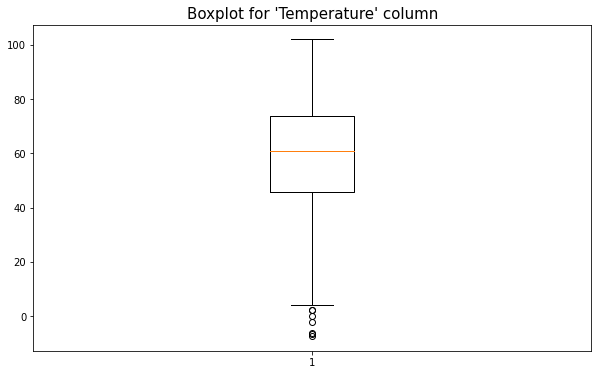

In [23]:
# Boxplot plot to check if there are any outliers in the 'Temperature' column 
plt.figure(figsize=(10,6))
plt.boxplot(df['Temperature'])
plt.title("Boxplot for 'Temperature' column",fontsize=15)
plt.show()  

In [24]:
# Outliers in 'Temperature' column
outlier_data = detect_outlier(df['Temperature'])
print("Outliers for 'Temperature' column are : ", outlier_data)

Outliers for 'Temperature' column are :  [-2.06, 2.32, -6.08, -6.61, -7.29, 2.45, 0.25]


Temperature might goes below the zero, as we seen min temperature is around -7, which is not a outliers.  Because, a temperature value of  [-2.06, 2.32, -6.08, -6.61, -7.29, 2.45, 0.25] is valid Temperature so removing outliers here is not a good option.

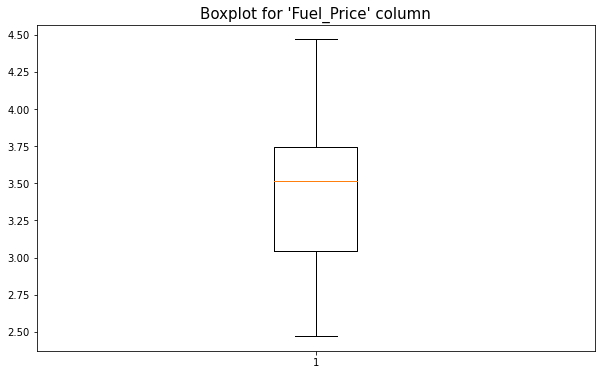

In [25]:
# Boxplot plot to check if there are any outliers in the 'Temperature' column 
plt.figure(figsize=(10,6))
plt.boxplot(df['Fuel_Price'])
plt.title("Boxplot for 'Fuel_Price' column",fontsize=15)
plt.show()  # no utliers found

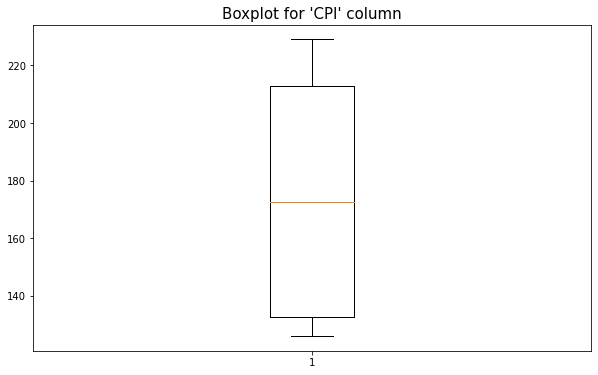

In [26]:
# Boxplot plot to check if there are any outliers in the 'Temperature' column 
plt.figure(figsize=(10,6))
plt.boxplot(df['CPI'])
plt.title("Boxplot for 'CPI' column",fontsize=15)
plt.show()  # no utliers found

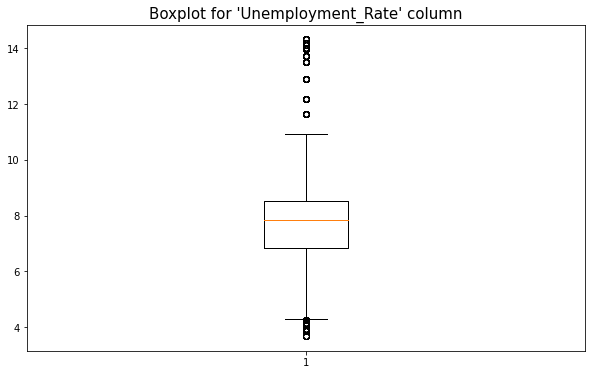

In [27]:
# Boxplot plot to check if there are any outliers in the 'Temperature' column 
plt.figure(figsize=(10,6))
plt.boxplot(df['Unemployment_Rate'])
plt.title("Boxplot for 'Unemployment_Rate' column",fontsize=15)
plt.show()  # no utliers found

In [28]:
# Outliers in 'Unemployment_Rate' column
outlier_data = detect_outlier(df['Unemployment_Rate'])
print("Outliers for 'Unemployment_Rate' column are : ", outlier_data)

Outliers for 'Unemployment_Rate' column are :  [13.975, 13.975, 13.975, 13.975, 13.975, 13.975, 13.975, 13.975, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.975, 13.975, 13.975, 13.975, 13.975, 13.975, 13.975, 13.975, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.313, 14

We are not going to remove these outliers, beacause the Unemployment_Rate might seems to be okay and it might goes to 14.

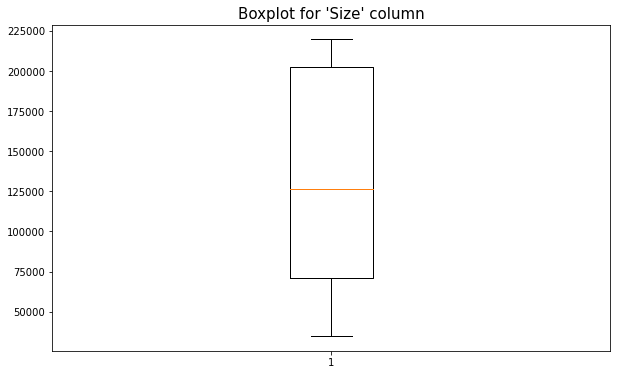

In [29]:
# Boxplot to check if there are any outliers in the 'Size' column 
plt.figure(figsize=(10,6))
plt.boxplot(df['Size'])
plt.title("Boxplot for 'Size' column",fontsize=15)
plt.show()  # no utliers found

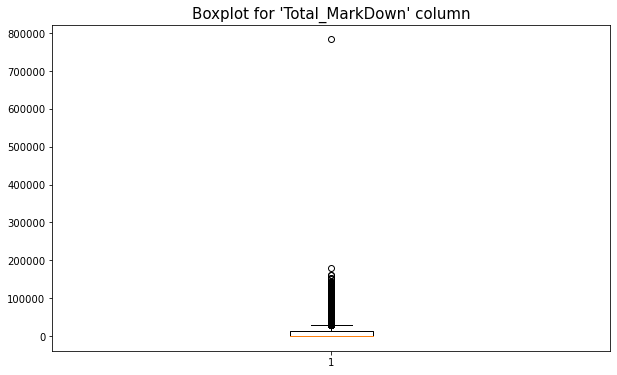

In [30]:
# Boxplot to check if there are any outliers in the 'Total_markdown' column 
plt.figure(figsize=(10,6))
plt.boxplot(df['Total_MarkDown'])
plt.title("Boxplot for 'Total_MarkDown' column",fontsize=15)
plt.show()

In [31]:
# Outliers in 'Total_markdown' column
outlier_data = detect_outlier(df['Total_MarkDown'])
print("Outliers for 'Total_MarkDown' column are : ", outlier_data)

Outliers for 'Total_MarkDown' column are :  [76351.06999999999, 76311.31000000001, 98974.87, 80045.4, 105528.0, 134773.50999999998, 109611.15000000001, 73717.26, 117660.84, 93322.93, 82098.40000000001, 110681.95, 101118.65999999999, 110853.45, 73561.14000000001, 84794.95, 92849.95, 74133.28, 115281.12999999999, 67107.66, 66563.21, 106926.52000000002, 77418.75, 78684.32999999999, 143223.31, 117682.51999999999, 83583.57, 149976.71, 79820.62999999999, 119437.66, 73367.27, 96513.93000000001, 85532.16, 122659.41, 70708.06, 70669.22, 133315.06, 66720.95999999999, 101355.79, 115446.52, 75070.48000000001, 114565.27, 70523.39, 100916.17, 126999.28, 66448.95, 69704.73, 153504.44, 75974.07, 178693.13999999998, 91671.96, 83143.31, 67395.51, 143777.92, 66197.91, 108493.39, 116118.54, 67634.55, 78258.6, 67583.15000000001, 78646.05, 96601.45, 106255.08, 72758.08, 69881.05, 81094.48, 75210.07999999999, 101206.8, 93464.21999999999, 117920.3, 118242.04, 66982.93000000001, 69327.23, 151904.86000000002, 1

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Total_MarkDown distributions')

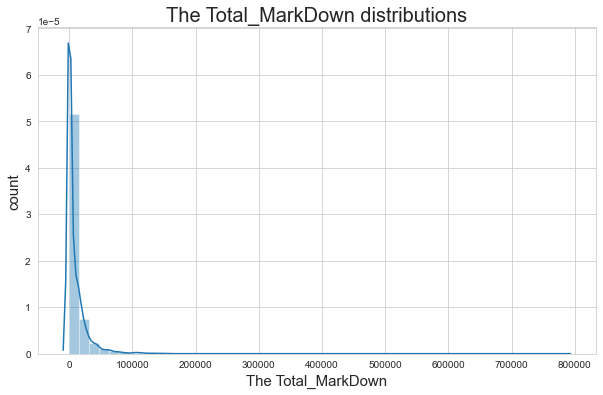

In [32]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(df['Total_MarkDown'])
plt.xlabel('The Total_MarkDown',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('The Total_MarkDown distributions',fontsize=20)

There appear to be a lot of positive outliers here as well, however this is not the case. Because the frequency of 0 "Total markdown" is so high, all other values are treated as outliers, as can be seen in the graph below.

In [33]:
# Defining continuous and categorical columns and converting "Total markdown" column as high and low
median_value = df.median()['Total_MarkDown']
df['Total_MarkDown'] = np.where(df['Total_MarkDown'] > median_value , "High", "Low")

In [34]:
# Continuous variables and categorical variables
Cont_cols = df[["Temperature", "Fuel_Price", "CPI", "Unemployment_Rate", "Total_Sales", "Size"]]
cat_cols = df[["Holiday", "Type","Total_MarkDown"]]

## EDA (Exploratory Data Analysis) on the cleaned Data

### Univariate analysis

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Total sales distributions')

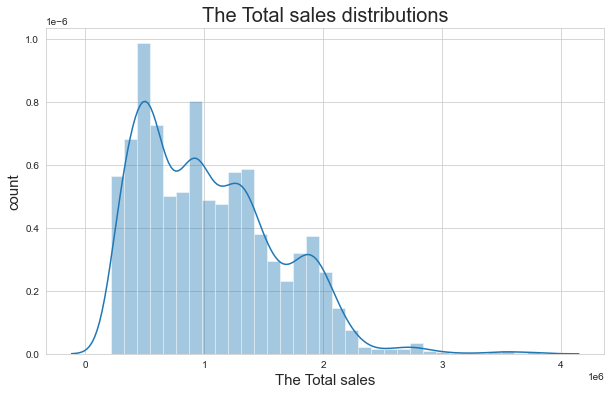

In [35]:
# Univariate analysis of column Total_Sales
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(df['Total_Sales'])
plt.xlabel('The Total sales',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('The Total sales distributions',fontsize=20)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Distribution of Temperature')

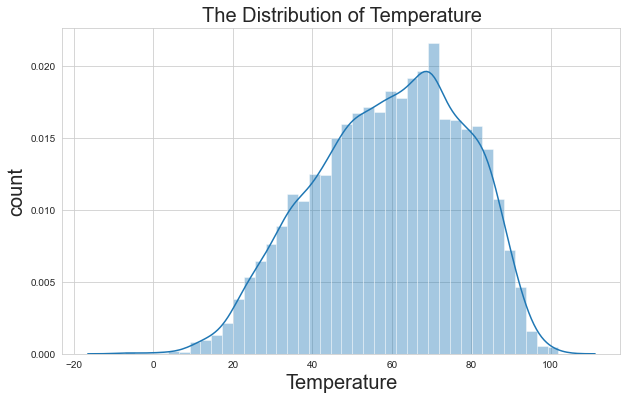

In [36]:
# Univariate analysis of column Temperature
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(df['Temperature'])
plt.xlabel('Temperature',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('The Distribution of Temperature',fontsize=20)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Distribution of CPI')

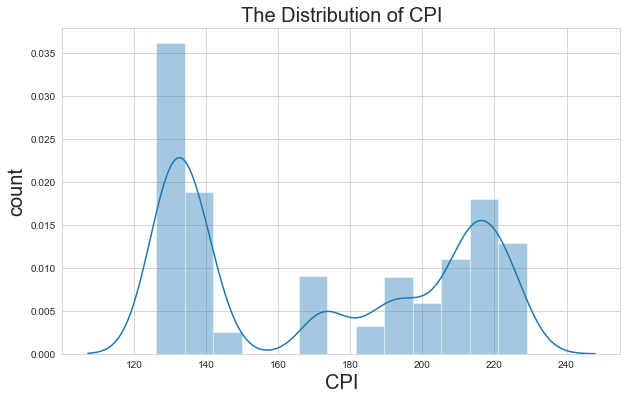

In [37]:
# Univariate analysis of column Temperature
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(df['CPI'])
plt.xlabel('CPI',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('The Distribution of CPI',fontsize=20)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Holidays')

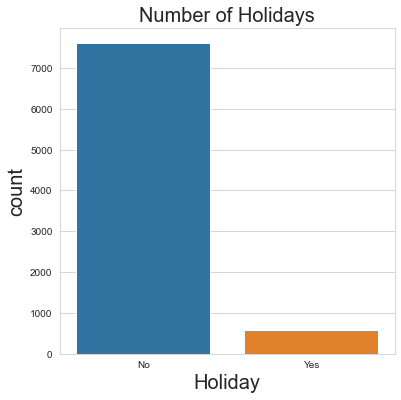

In [38]:
plt.figure(figsize=(6,6))
sns.countplot(df['Holiday'])
plt.xlabel('Holiday',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('Number of Holidays',fontsize=20)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Type')

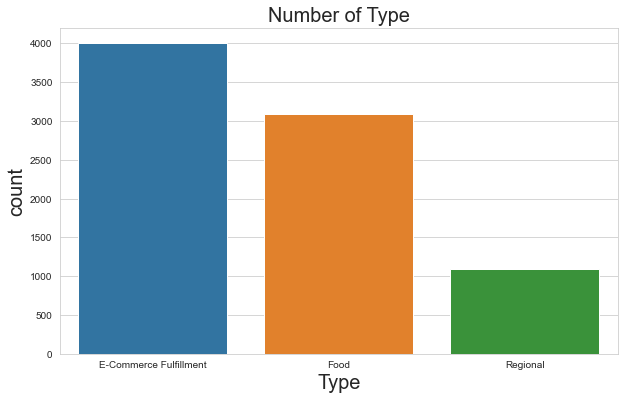

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(df['Type'])
plt.xlabel('Type',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('Number of Type',fontsize=20)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weeknumber', ylabel='count'>

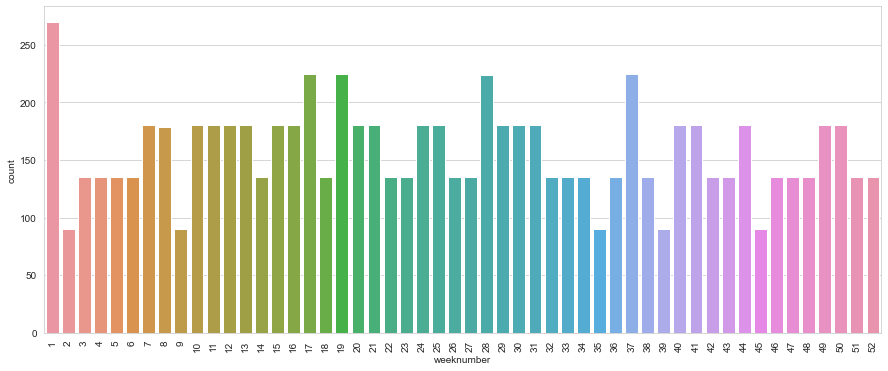

In [40]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.countplot(df.weeknumber)

### Bivariate analysis

Text(0.5, 1.0, 'Number of Holidays')

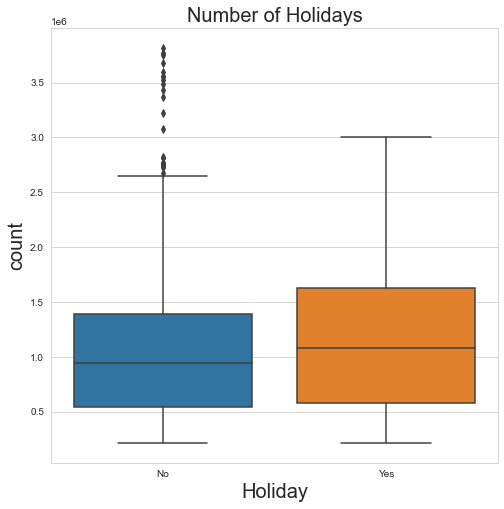

In [41]:
# Holidays and sales 
plt.figure(figsize=(8,8))
sns.boxplot(x='Holiday',y='Total_Sales',data=df)
plt.xlabel('Holiday',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('Number of Holidays',fontsize=20)

By looking at above graph we conclude that there is more sales during the Holidays. It means that poeple prefer to do shopping during the holidays. So during the holidays we would recommended to give some good offer to attract the customers.

Text(0.5, 1.0, 'Number of Total_MarkDown')

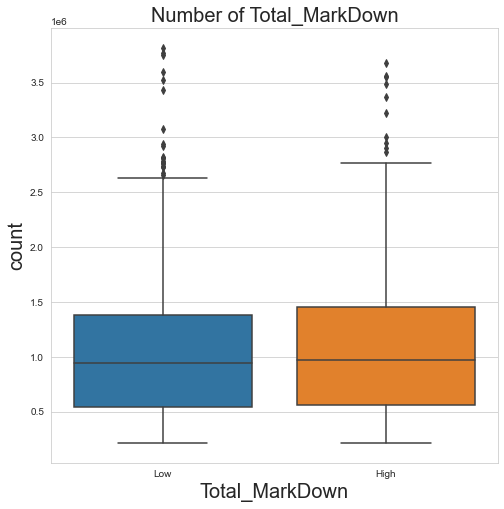

In [42]:
#  and sales 
plt.figure(figsize=(8,8))
sns.boxplot(x='Total_MarkDown',y='Total_Sales',data=df)
plt.xlabel('Total_MarkDown',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('Number of Total_MarkDown',fontsize=20)

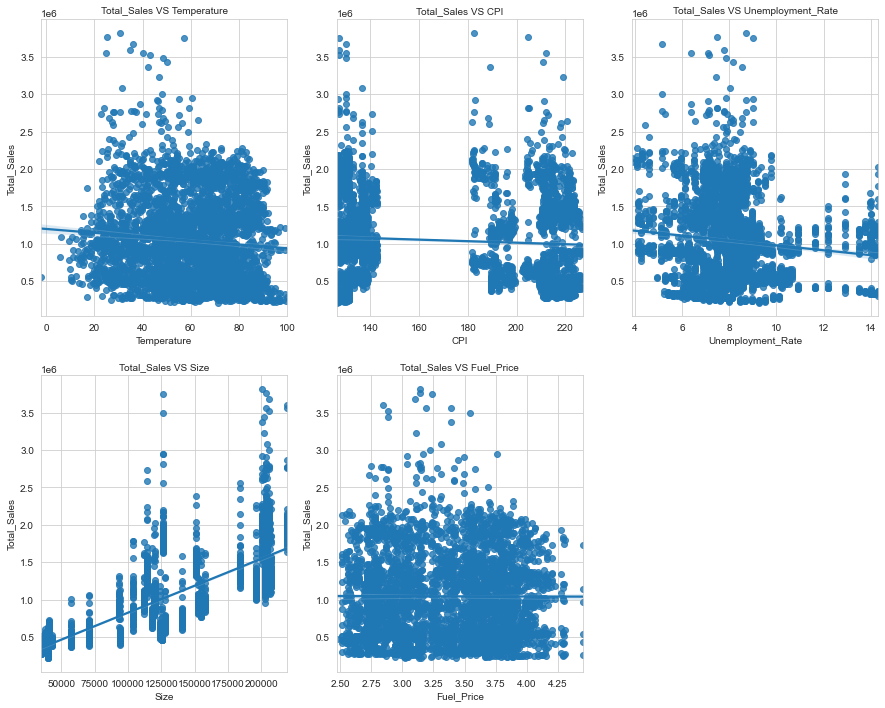

In [43]:
# Code for creating scatter plot for continuous variables 
plt.figure(figsize = (15,12))
cols = ["Temperature", "CPI", "Unemployment_Rate", "Size","Fuel_Price"]
s = 1
for r in range(len(cols)):
  plt.subplot(2,3,s)
  s = s + 1
  sns.regplot(x = cols[r], y = 'Total_Sales', data = df, fit_reg=True)
  plt.title("Total_Sales VS " + cols[r], fontsize = 10)

### Features selection
- Correlation
- SelectKBest (ANOVA )
- Features Importance

In [44]:
# Continuous variables and categorical variables
Cont_cols = df[["Temperature", "Fuel_Price", "CPI", "Unemployment_Rate", "Total_Sales", "Size"]]
cat_cols = df[["Holiday", "Type","Total_MarkDown"]]

In [45]:
Cont_cols.corr()

,Temperature,Fuel_Price,CPI,Unemployment_Rate,Total_Sales,Size
Temperature,1.000000,0.101416,0.158765,0.145653,-0.085423,-0.093383
Fuel_Price,0.101416,1.000000,-0.184169,-0.032907,-0.002804,0.015077
CPI,0.158765,-0.184169,1.000000,-0.302919,-0.070087,-0.008955
Unemployment_Rate,0.145653,-0.032907,-0.302919,1.000000,-0.107199,-0.073715
Total_Sales,-0.085423,-0.002804,-0.070087,-0.107199,1.000000,0.795552
Size,-0.093383,0.015077,-0.008955,-0.073715,0.795552,1.000000


<AxesSubplot:>

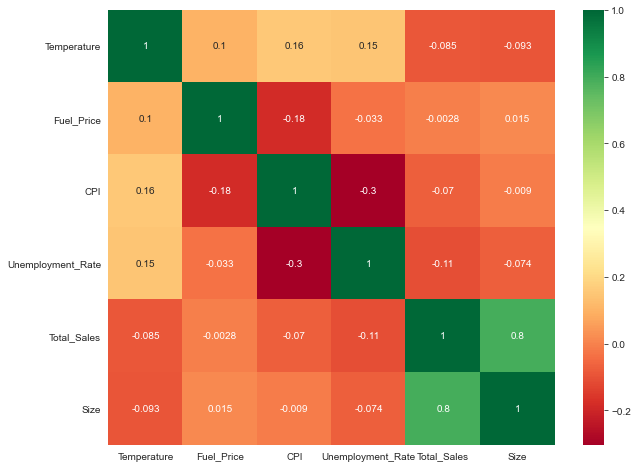

In [46]:
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(Cont_cols.corr(),annot = True, cmap = "RdYlGn")

- sales vs Temeprature---> Weak correlation
- sales vs fuel_price---> No correlation
- sales vs CPI---> Weak correlation
- sales vs unemployment_rate---> Weak correlation
- sales vs size--->strong positive correlation

In [47]:
#Removing correlated features
Threshold=0.9

In [48]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [49]:
correlation(Cont_cols,Threshold)

set()

**From correlation we conclude that the none of independent features are highly correlated, so there is no multicollinarity**

In [50]:
# We will remove fuel price 
df.drop('Fuel_Price',axis=1,inplace=True)

### Anova
Since our dependent variable is continuous("Total_Sales") and independents are both categorical as well as continuous so to 

- continous vs continous -----> correlation
- categorical vs contnoius----> ANOVA

In ANOVA test, we will find the p value and then we will try to reject or accept the null hypothesis to find whether the independent variable is correlated with the dependent variable or not.

- Null: Independent and dependent variables are non-correlated.

- Alternate: Independent and dependent variables are correlated.

If p<0.05, we will reject null hypothesis

In [51]:
# ANOVA test
import statsmodels.api as sm
from statsmodels.formula.api import ols


for col in cat_cols:
    model = ols('Total_Sales' + '~' + col, data = df).fit() # Oridnary least square method
    result_anova = sm.stats.anova_lm(model) # ANOVA Test
    print("Anova test results for", col)
    print(result_anova)
    print("################################################\n")

Anova test results for Holiday
              df        sum_sq       mean_sq          F    PR(>F)
Holiday      1.0  4.361665e+12  4.361665e+12  13.368263  0.000259
Residual  3778.0  1.232649e+15  3.262701e+11        NaN       NaN
################################################

Anova test results for Type
              df        sum_sq       mean_sq            F  PR(>F)
Type         2.0  4.301251e+14  2.150626e+14  1006.700088     0.0
Residual  3777.0  8.068851e+14  2.136312e+11          NaN     NaN
################################################

Anova test results for Total_MarkDown
                    df        sum_sq       mean_sq         F   PR(>F)
Total_MarkDown     1.0  1.035733e+12  1.035733e+12  3.165921  0.07527
Residual        3778.0  1.235975e+15  3.271505e+11       NaN      NaN
################################################



Since pvalue<0.05, we will not reject the null hypothesis

### Feature Engineering
- One hot encoding ----> nominal data
- label encoding -----> ordinal data

In [52]:
df.head()

,Temperature,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Size,weeknumber,Total_MarkDown
0,42.31,211.096358,8.106,No,1643690.90,E-Commerce Fulfillment,151315,17,Low
1,38.51,211.242170,8.106,Yes,1641957.44,E-Commerce Fulfillment,151315,48,Low
2,39.93,211.289143,8.106,No,1611968.17,E-Commerce Fulfillment,151315,7,Low
3,46.63,211.319643,8.106,No,1409727.59,E-Commerce Fulfillment,151315,8,Low
4,46.50,211.350143,8.106,No,NaN,E-Commerce Fulfillment,151315,18,Low


In [53]:
# Label encoding 
df['Holiday'].replace({"Yes":1,"No":0},inplace=True)
df['Total_MarkDown'].replace({"High" : 1, "Low" : 0}, inplace = True)


In [54]:
#One hot encoding
Types= pd.get_dummies(df['Type'],drop_first=True)

In [55]:
# Now we will concate the type 
df= pd.concat([df,Types],axis=1)
df.head()

,Temperature,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Size,weeknumber,Total_MarkDown,Food,Regional
0,42.31,211.096358,8.106,0,1643690.90,E-Commerce Fulfillment,151315,17,0,0,0
1,38.51,211.242170,8.106,1,1641957.44,E-Commerce Fulfillment,151315,48,0,0,0
2,39.93,211.289143,8.106,0,1611968.17,E-Commerce Fulfillment,151315,7,0,0,0
3,46.63,211.319643,8.106,0,1409727.59,E-Commerce Fulfillment,151315,8,0,0,0
4,46.50,211.350143,8.106,0,NaN,E-Commerce Fulfillment,151315,18,0,0,0


In [56]:
# Drop the column 'Type'
df.drop('Type',inplace=True,axis=1)
df.head()

,Temperature,CPI,Unemployment_Rate,Holiday,Total_Sales,Size,weeknumber,Total_MarkDown,Food,Regional
0,42.31,211.096358,8.106,0,1643690.90,151315,17,0,0,0
1,38.51,211.242170,8.106,1,1641957.44,151315,48,0,0,0
2,39.93,211.289143,8.106,0,1611968.17,151315,7,0,0,0
3,46.63,211.319643,8.106,0,1409727.59,151315,8,0,0,0
4,46.50,211.350143,8.106,0,NaN,151315,18,0,0,0


### Trianing Data
We will seperate the train data and test data, we will predict the missing Total sales value.

In [57]:
# Training data
train_df= df.copy()

In [58]:
# Dropping nan values from training data
train_df.dropna(inplace=True)
train_df.head()

,Temperature,CPI,Unemployment_Rate,Holiday,Total_Sales,Size,weeknumber,Total_MarkDown,Food,Regional
0,42.31,211.096358,8.106,0,1643690.90,151315,17,0,0,0
1,38.51,211.242170,8.106,1,1641957.44,151315,48,0,0,0
2,39.93,211.289143,8.106,0,1611968.17,151315,7,0,0,0
3,46.63,211.319643,8.106,0,1409727.59,151315,8,0,0,0
6,54.58,211.215635,8.106,0,1472515.79,151315,11,0,0,0


In [59]:
train_df.shape

(3780, 10)

In [60]:
# Creating Independet and dependet variables
X=train_df.drop('Total_Sales',axis=1)
y= train_df['Total_Sales']

In [61]:
X.head()

,Temperature,CPI,Unemployment_Rate,Holiday,Size,weeknumber,Total_MarkDown,Food,Regional
0,42.31,211.096358,8.106,0,151315,17,0,0,0
1,38.51,211.242170,8.106,1,151315,48,0,0,0
2,39.93,211.289143,8.106,0,151315,7,0,0,0
3,46.63,211.319643,8.106,0,151315,8,0,0,0
6,54.58,211.215635,8.106,0,151315,11,0,0,0


### feature imporatance

In [62]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

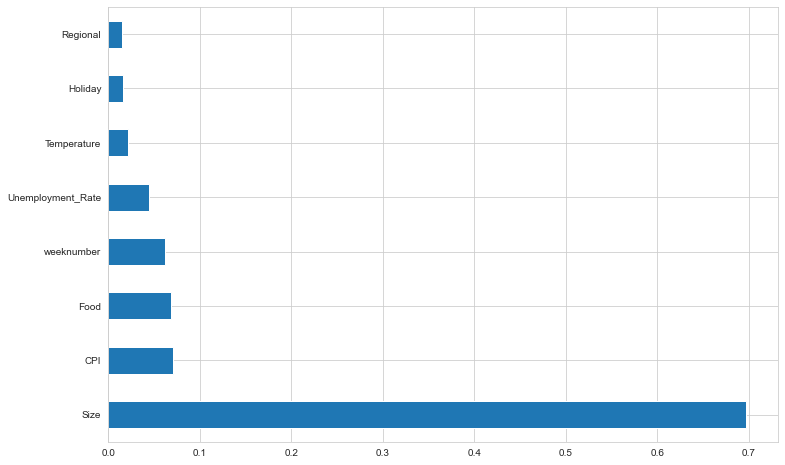

In [63]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

### Fitting models
- Split dataset into train and test set in order to prediction w.r.t X_test
- Scaling of features
- Import model
- Fit the data
- Predict w.r.t X_test
- In regression check RSME Score
- Plot error graph
- finally pick the best model and predict the missing sales values

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [65]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
###  fit_transform
X_train_scaled=scaler.fit_transform(X_train) #alway give parameter in fit_transform
X_test_scaled=scaler.transform(X_test)

In [66]:
X_test_scaled.shape,X_train_scaled.shape

((756, 9), (3024, 9))

### Linear Regression Model

In [67]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train_scaled,y_train)

LinearRegression()

In [68]:
# predicting the model
y_pred=reg.predict(X_test_scaled)

In [69]:
#Accuracy
print(reg.score(X_test_scaled,y_test))
print(reg.score(X_train_scaled,y_train))

0.7220341624925302
0.6401731174398315


Here the Training and testing accuracy not too much differ, it means our model is not overfitting 

In [70]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute percentage Error:',metrics.mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 224891.59628264653
Mean Squared Error: 90470646254.37038
Root Mean Squared Error: 300783.3875970719
Mean Absolute percentage Error: 0.26108598877867656


### Random Forest model

In [71]:
from sklearn.ensemble import RandomForestRegressor
rf_reg= RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [72]:
y_pred= rf_reg.predict(X_test)

In [73]:
#Accuracy
print(rf_reg.score(X_test,y_test))
print(rf_reg.score(X_train,y_train))

0.9654502172540046
0.994364271676109


In [100]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute percentage Error:',metrics.mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 58374.21558730162
Mean Squared Error: 11245055151.406164
Root Mean Squared Error: 106042.7043761435
Mean Absolute percentage Error: 0.05707033647141502


By random forest we achieve good accuracy which is 96.6%

### Stat Model 

In [74]:
# Fitting stats 
# Adding intercept term to the data
x_train = sm.add_constant(X_train)
x_test = sm.add_constant(X_test)
# training the model and printing the model statistics
model_stats = sm.OLS(y_train,x_train).fit()
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Sales   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     595.8
Date:                Thu, 28 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:28:50   Log-Likelihood:                -42833.
No. Observations:                3024   AIC:                         8.569e+04
Df Residuals:                    3014   BIC:                         8.575e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.329e+05   5.93e+04      3.925      0.000    1.17e+05    3.49e+05
Temperature         353.7514    379.580      0.932      0.351    -390.511    1098.013
CPI               -1276.0361    172.218     -7.409      0.000   -1613.713    -938.359
Unemployment_Rate -2.381e+04   3703.686     -6.430      0.000   -3.11e+04   -1.66e+04
Holiday            6.603e+04   2.88e+04      2.295      0.022    9618.805    1.22e+05
Size                  7.9136      0.165     48.008      0.000       7.590       8.237
weeknumber         3791.2105    509.870      7.436      0.000    2791.482    4790.939
Total_MarkDown     2.279e+04   1.34e+04      1.695      0.090   -3573.802    4.92e+04
Food               6.929e+04   1.86e+04      3.734      0.000    3.29e+04    1.06e+05
Regional           1.998e+05   3.02e+04      6.620      0.000    1.41e+05    2.59e+05
==============================================================================
Omnibus:                      930.262   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3943.649
Skew:                           1.442   Prob(JB):                         0.00
Kurtosis:                       7.794   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
# Performance on test data
from sklearn.metrics import mean_squared_error,r2_score
y_pred_stat = model_stats.predict(x_test)

test_MSE = mean_squared_error(y_test,y_pred_stat )
test_r2score = r2_score(y_test,y_pred_stat )
print("MSE after training the data by stats linear model:",test_MSE)
print("r2 score after training the data by stats linear model : ",test_r2score)

MSE after training the data by stats linear model: 90470646254.37021
r2 score after training the data by stats linear model :  0.7220341624925307


In [76]:
# Performance on training data
predict_train = model_stats.predict(x_train)

train_MSE_ = mean_squared_error(y_train, predict_train)
train_r2score= r2_score(y_train, predict_train)
print("MSE after training the data by stats model:",train_MSE_)
print("r2 score after training the data by stats model : ",train_r2score)

MSE after training the data by stats model: 117668522498.38525
r2 score after training the data by stats model :  0.6401731174398315


The accuracy of model in both sklearn model 72% and stat model is almost 64 %

In [77]:
# Droppig the variable which is not statstically significant 
x_train_new=X_train.drop('Temperature',axis=1)
x_test_new=X_test.drop('Temperature',axis=1)

In [78]:
# Again fitting the model on new train data
reg.fit(x_train_new,y_train)

LinearRegression()

In [79]:
#Building stat model
x_train_stat = sm.add_constant(x_train_new)
x_test_stat = sm.add_constant(x_test_new)
# training the model and printing the model statistics
model_stats = sm.OLS(y_train,x_train_stat).fit()
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Sales   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     670.2
Date:                Thu, 28 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:28:51   Log-Likelihood:                -42834.
No. Observations:                3024   AIC:                         8.569e+04
Df Residuals:                    3015   BIC:                         8.574e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.426e+05   5.84e+04      4.153      0.000    1.28e+05    3.57e+05
CPI               -1240.4188    167.921     -7.387      0.000   -1569.669    -911.168
Unemployment_Rate -2.321e+04   3645.969     -6.365      0.000   -3.04e+04   -1.61e+04
Holiday            5.567e+04   2.65e+04      2.098      0.036    3640.796    1.08e+05
Size                  7.9002      0.164     48.110      0.000       7.578       8.222
weeknumber         3916.7257    491.751      7.965      0.000    2952.525    4880.926
Total_MarkDown     2.334e+04   1.34e+04      1.737      0.082   -3001.481    4.97e+04
Food                6.74e+04   1.84e+04      3.654      0.000    3.12e+04    1.04e+05
Regional           1.999e+05   3.02e+04      6.622      0.000    1.41e+05    2.59e+05
==============================================================================
Omnibus:                      920.884   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3844.045
Skew:                           1.432   Prob(JB):                         0.00
Kurtosis:                       7.723   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
# Performance on test data on stat model
y_pred_test_stat= model_stats.predict(x_test_stat)

print("The mse of stat model is:", mean_squared_error(y_test,y_pred_test_stat))
print("The r2 score of stat model is:", r2_score(y_test,y_pred_test_stat))


The mse of stat model is: 90198341854.87434
The r2 score of stat model is: 0.7228708020391303


### Test data 

In [91]:
## Test data to be predicted 
test_data = df[df['Total_Sales'].isna()].reset_index().drop(columns = ['index'])
test_data.head()

,Temperature,CPI,Unemployment_Rate,Holiday,Total_Sales,Size,weeknumber,Total_MarkDown,Food,Regional
0,46.50,211.350143,8.106,0,NaN,151315,18,0,0,0
1,57.79,211.380643,8.106,0,NaN,151315,48,0,0,0
2,62.27,210.820450,7.808,0,NaN,151315,5,0,0,0
3,65.86,210.622857,7.808,0,NaN,151315,35,0,0,0
4,72.55,210.339968,7.808,0,NaN,151315,27,0,0,0


In [92]:
test_data.shape, train_df.shape

((4408, 10), (3780, 10))

In [93]:
#Dropping the sales column from test data
test_data.drop('Total_Sales',inplace=True,axis=1)


In [94]:
test_data.shape, train_df.shape

((4408, 9), (3780, 10))

In [95]:
#scalling the test data
test_data_scaled= scaler.transform(test_data)

In [96]:
# converting into data frame
test_data_scaled=pd.DataFrame(test_data_scaled)
test_data_scaled.head()

,0,1,2,3,4,5,6,7,8
0,0.475147,0.842989,0.405118,0.0,0.630267,0.306122,0.0,0.0,0.0
1,0.585616,0.843290,0.405118,0.0,0.630267,0.918367,0.0,0.0,0.0
2,0.629452,0.837752,0.376557,0.0,0.630267,0.040816,0.0,0.0,0.0
3,0.664579,0.835799,0.376557,0.0,0.630267,0.653061,0.0,0.0,0.0
4,0.730039,0.833002,0.376557,0.0,0.630267,0.489796,0.0,0.0,0.0


In [97]:
# Prediction on test data and saving of results
prediction_result = rf_reg.predict(test_data_scaled)
test_data_scaled['Total_Sales'] = prediction_result
test_data_scaled.to_csv("predicted_total_sales.csv")

In [98]:
train_df.to_csv('Actucal_data.csv')

### Conclusion:

In this notebook, we tried to predict the total sales of sales history dataof store which is located on different location. We have build both sklearn and stat model , from sklearn model we got accuracy of 96.6% and from satat model we achieved 64%. We have done:
- Data preprocessing
- Univariate/Bi-variate analysis
- Feature selection
- Feature engineering
- Model Building
- stat model building
- prediction of test data